<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_WEEK04_1_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# < 사이킷런으로 시작하는 머신러닝 >

# **1. 사이킷런 소개와 특징**

사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 사이킷런 특징
1.  파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 가장 파이썬스러운 API를 제공
2.  머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공
3.  오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리

- Anaconda를 설치하면 기본으로 사이킷런까지 설치가 완료되기에 별도의 설치가 필요 없음
- 하지만 사이킷런의 버전 업그레이드가 여전히 활발히 진행되고 있기에 이 책의 현재 시점에서 최신 버전인 1.0.2에서 모든 실습 코드를 테스트함
- 사이킷런 최신 버전 1.0.2를 설치하려면 아나콘다 Prompt를 열고 아래와 같이 pip를 이용해 설치하면 됨

In [ ]:
pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 29.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


- 시간이 지나면서 좀 더 최신 버전의 사이킷런을 설치하고자 한다면 pip install -U scikit-learn으로
설치하면 됨
- 아래는 사이킷런 재설치가 완료된 후의 버전 확인 코드

In [ ]:
import sklearn
print(sklearn.__version__)

# 최신 버전이 1.6.1이며 환경에 원래 이 버전이 있었음

1.6.1


# **2. 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기**

- 사이킷런을 통해 첫 번째로 만들어볼 머신러닝 모델은 붓꽃 데이터 세트로 붓꽃의 품종을 분류하는 것
- 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 것

- 분류(Classification)는 대표적인 지도학습 방법의 하나
- 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측
- 즉 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
- 이때 학습을 위해 주어진 데이터 세트를 '학습 데이터 세트', 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 '테스트 데이터 세트'로 지칭


- 먼저 사이킷런에서 사용할 모듈을 임포트
- 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있음
- sklearn.datasets 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
- 하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할수 있음
- 붓꽃 데이터 세트를 생성하는 데는 load_iris()를 이용하며, ML 알고리즘은 의사 결정 트리(Decision Tree) 알고리즘으로, 이를 구현한 DecisionTreeClassifier를 적용
- 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데는 train_test_split() 함수를 사용할 것


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환

In [ ]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(5)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [ ]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 피처에는 sepal length, sepal width, petal length, petal width가 있음
- 레이블(Label, 결정값)은 0, 1, 2 세 가지 값으로 돼 있으며 0이 Setosa 품종, 1 이 versicolor 품종, 2가 virginica 품종을 의미

- 학습용 데이터와 테스트용 데이터는 반드시 분리해야 함
- 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 테스트 데이터 세트가 필요하기 때문
- 이를 위해 사이킷런은 train_test_split() API를 제공
- train_test_split()을 이용하면 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 쉽게 분할
- 예를 들어 test_size=0.2로 입력 파라미터를 설정하면 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분할
- 먼저 train_test_split()을 호출한 후 좀 더 자세히 입력 파라미터와 반환 값을 살펴보고자 함

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- train_test_split()의 첫 번째 파라미터인 iris_data는 피처 데이터 세트
- 두 번째 파라미터인 iris_label은 레이블(Label) 데이터 세트
- 그리고 test_size=0.2는 전체 데이터 세트 중 테스트
데이터 세트의 비율
- 마지막으로 random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
- train_test_split()는 호출 시 무작위로 데이터를
분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있음
- 본 예제는 실습용 예제이므로 수행할 때마다 동일한 데이터 세트로 분리하기 위해 random_state를 일정한 숫자 값으로 부여함 (random_state는 random값을 만드는 seed와 같은 의미이며, 숫자 자체는 어떤 값을 지정해도 상관없음)
- 위 예제에서 train_test_split()은 학습용 피처 데이터 세트를 X_train으로, 테스트용 피처 데이터 세트
를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환함
- 이제 학습 데이터를 확보했으니 이 데이터를 기반으로 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용해 학습과 예측을 수행해 볼 예정
- 먼저 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성(DecisionTreeClassifier 객체 생성 시 입력된
random_state=11 역시 예제 코드를 수행할 때마다 동일한 학습/예측 결과를 출력하기 위한 용도로만
사용됨)
- 생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력해 호출하면 학습을 수행

In [ ]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

- 이제 의사 결정 트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습이 완료된 상태
- 이렇게 학습된 DecisionTreeClassifier 객체를 이용해 예측을 수행
- 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적= 테스트 데이터 세트를 이용
- DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [ ]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

- 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가
- 일반적으로 머신러닝 모델의 성능 평가 방법은 여러 가지가 있으나, 여기서는 정확도를 측정
- 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
- 정확도 식 = 맞게 예측한 개수/전체 데이터 개수
- 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인
- 사이킷런은 정확도 측정을 위해 accuracy_score() 함수를 제공
- accuracy_score()의 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력하면 됨

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
# '{인덱스:형식}'.format(값1, 값2,...)
# 인덱스 = format() 안에 전달된 값의 순서를 지정(0부터 시작)
# 형식 = 출력 형식을 지정(소수점 아래 4자리까지 출력)

예측 정확도: 0.9333


In [ ]:
# 정확도 반환
# y_test = 실제 정답, pred = 모델이 예측한 값
accuracy_score(y_test, pred)

0.9333333333333333

<정리>
1.   데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측
4. 평가: 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가

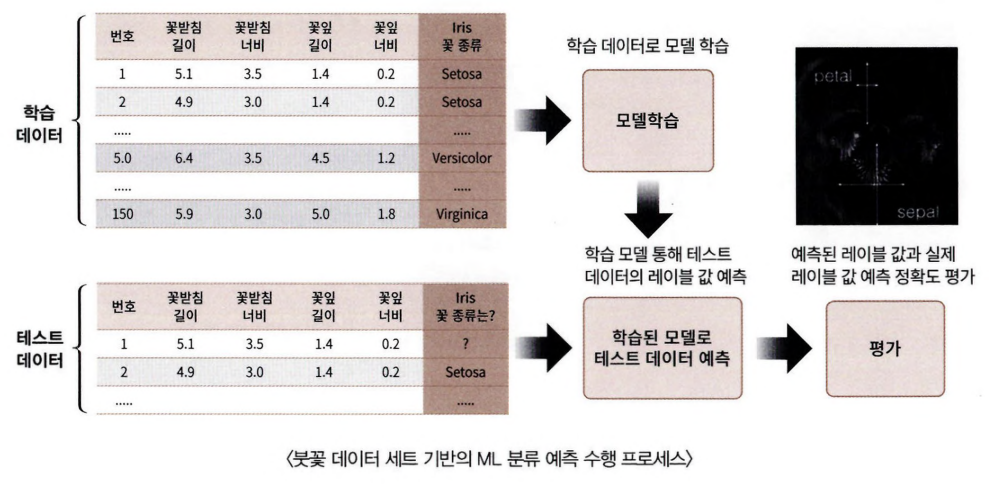

# **3. 사이킷런의 기반 프레임워크 익히기**

**Estimator 이해 및 fit(), predict() 메서드**

- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공
- 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷
런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭
- 사이킷런은 매우 많은 유형의 Classifier와 Regressor 클래스를 제공
- 이들 Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부름
- 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름
- 당연히 Estimator 클래스는 fit()과 predict()를
내부에서 구현하고 있음

- cross_val_score( )와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원
하는 클래스의 경우 이 Estimator를 인자로 받음
- 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행

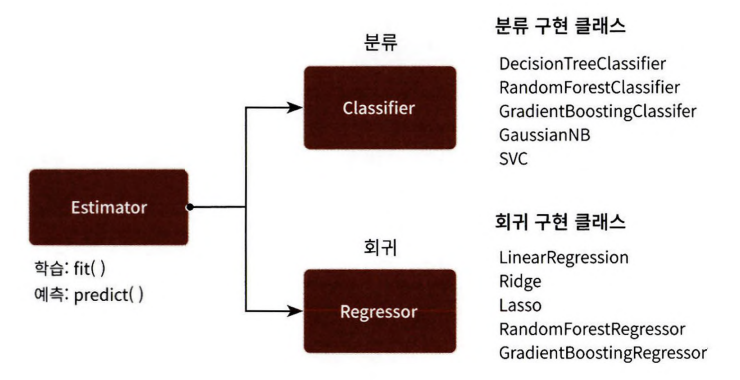

- 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용
- 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
- fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터 링, 피처 추출 등의 실제 작업은 transform()으로 수행
- 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공
- fit_transform()은 fit()과 transform()을 별도로 호출할 필요를 줄여주지만, 사용에 약간의 주의가 필요
- 비지도학습을 설명하는 단원에서 fit()과 transform()을 개별적으로 적용하는 것과 fit_transform()을 한번에 적용하는 것의 차이를 설명할 예정

**사이킷런의 주요 모듈**

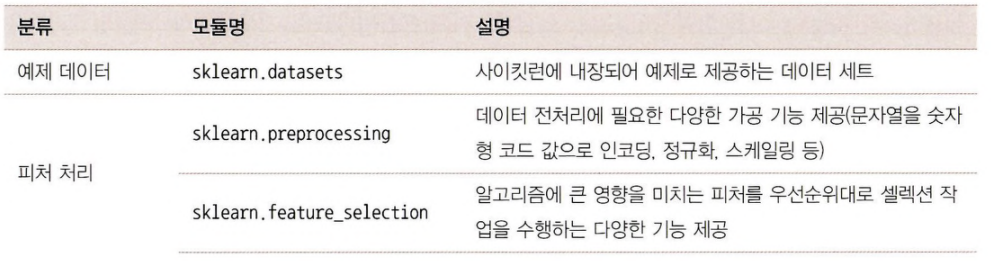
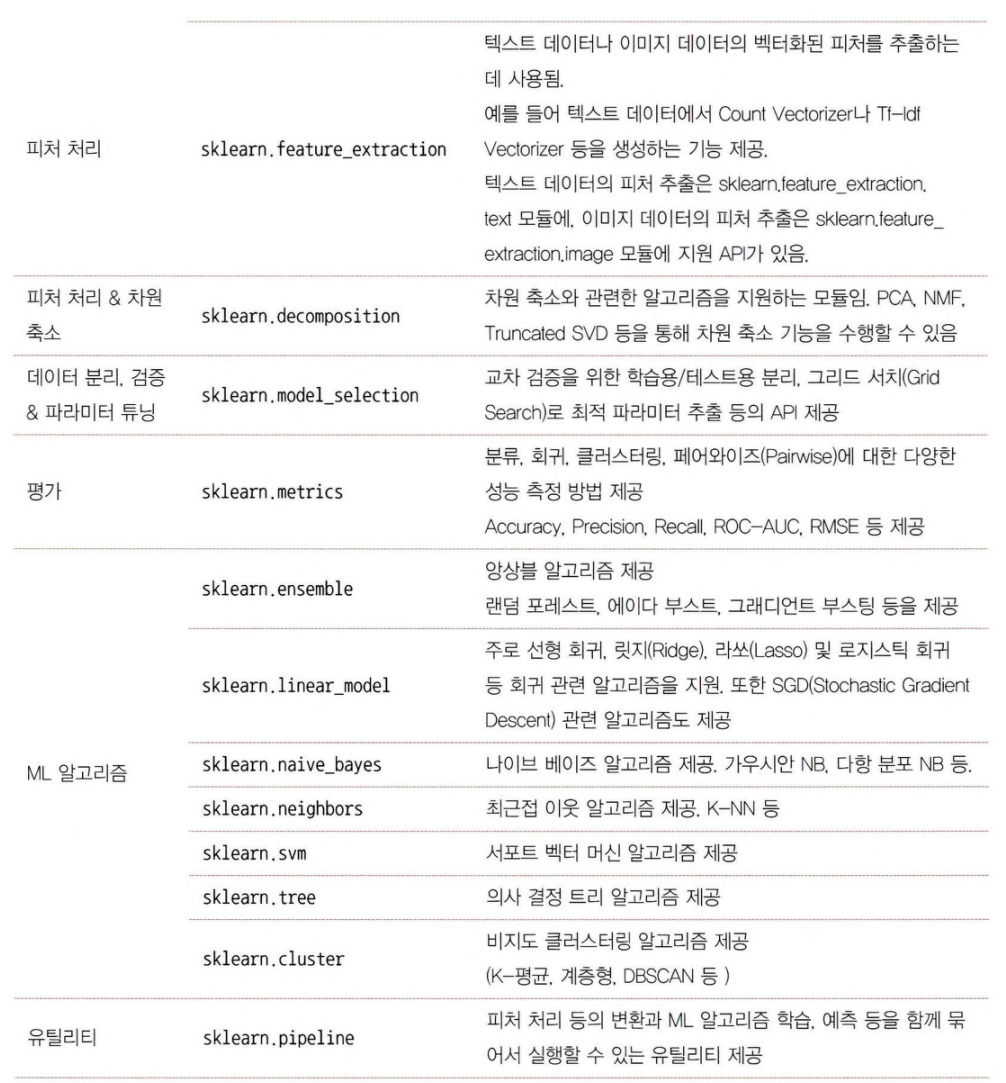

일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리(feature processing), ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것

**내장된 예제 데이터 세트**
- 사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 내려받을 필요 없이 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장돼 있음
- 이 데이터는 datasets 모듈에 있는 여러 API를 호출해 만들 수 있음
- 사이킷런에 내장 되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나뉘어짐

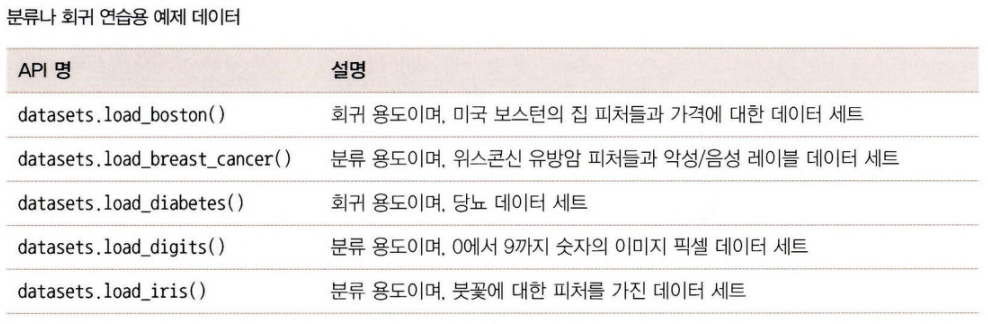

- fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장돼 있지 않고 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브디렉터리에 저장한 후 추후 불러들이는 데이터
- 따라서 최초 사용 시에 인터넷에 연결돼 있지 않으면 사용할 수 없음

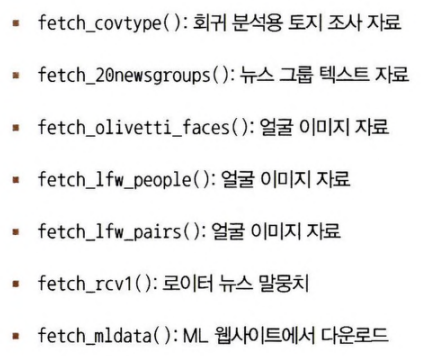
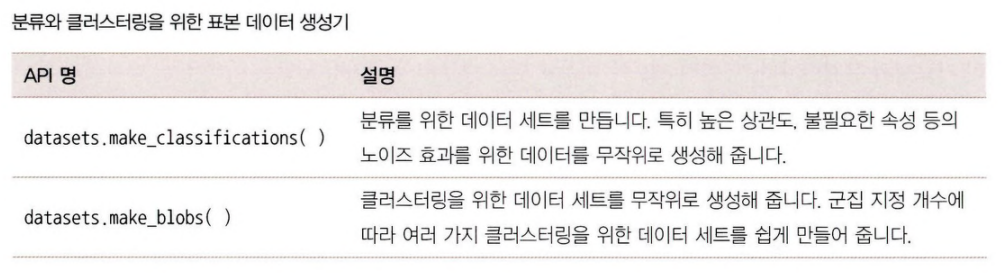

분류나 회귀를 위한 연습용 예제 데이터 구성
- 사이킷런에 내장된 이 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있음
- 키는 보통 data, target, target_name, feature_names, DESCR로 구성돼 있음
- 개별 키가 가리키는 데이터 세트의 의미는 다음과 같음

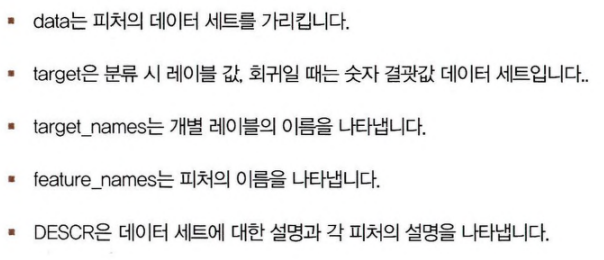

- data, target은 넘파이 배열(ndarray) 타입이며, targetjnames, feature_names는 넘파이 배열 또는 파이썬 리스트(list) 타입
- DESCR은 스트링 타입
- 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key값을 지정하면 됨
- 먼저 붓꽃 데이터 세트를 생성

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


- load_iris() API의 반환 결과는 sklearn.utils.Bunch 클래스
- Bunch 클래스는 파이썬 딕셔너리 자료형과 유사
- 데이터 세트에 내장돼 있는 대부분의 데이터 세트는 이와 같이 딕셔너리 형태의 값을 반환
- 아래는 딕셔너리 형태의 load_iris() 데이터 세트의 key 값을 확인하는 코드
- 이들 중 data, target, target_names, feature_names가 주요한 key 값

In [2]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- 데이터 키는 피처들의 데이터 값을 가리킴
- 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터
값을 추출하기 위해서는 데이터 세트.data(또는 데이터 세트['data'])를 이용하면 됨
- 마찬가지로 target, feature_names, DESCR key가 가리키는 데이터 값의 추출도 동일하게 수행하면 됨
- 다음 그림은 load_iris()가 반환하는 붓꽃 데이터 세트의 각 키가 의미하는 값을 표시한 것

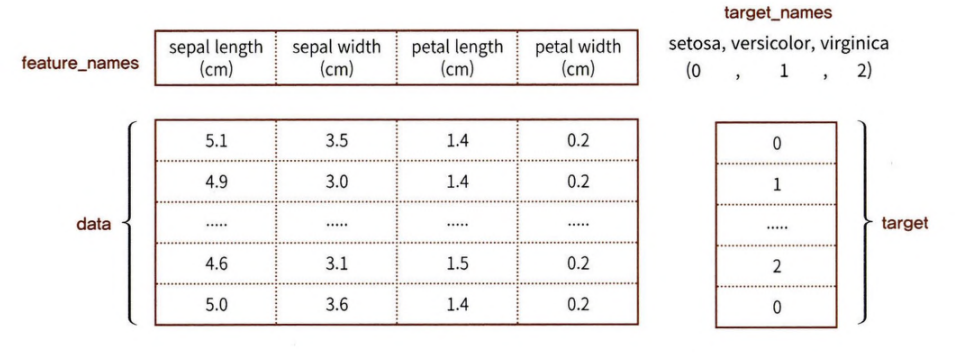

load_iris()가 반환하는 객체의 키인 feature_names, target_name, data, target이 가리키는 값을 다음 예제 코드에 출력

In [5]:
print('\nfeature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\ntarget_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\ndata의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\ntarget의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print(iris_data.target)


feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5

#**4. Model Selection 모듈 소개**